# Logistic regression


<td> <img src="intro/ml_alg.jpg" alt="Drawing" style="width: 1200px;"/></td>  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Linear regression

* How many/much? 
* Output data $ y \in \mathbb{R} $
* Predicting continuous numbers, e.g. temperature of a room, price of apples, etc.


\begin{equation*}
h_{\theta}(x) = \mathbf{\theta}^\intercal \mathbf{x} + \theta_0
\end{equation*}  


### Logistic regression

* **Classification:** Assigning a datapoint to a category/class.
* Output data are categories.

* What is the probability that today is rainy?

#### Binary classification
* Only two labels  $ y \in \{0,1\} $
    * Yes or no
    * zero or one
    * positive or negative
    * True or False

We can have more than two labels
    


### Rain measurement  vs Rain yes/no

In [2]:
def syn1(N):
    """ data(samples, features)"""
    
    global seed
    np.random.seed(seed)
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)
  
    data[:N1,0] = 40 + np.random.normal(loc=5, scale=.3, size=(N1))
    data[N1:,0] = 15 + np.random.normal(loc=5, scale=.3, size=(N-N1))
    data[:,1] = 5*np.random.normal(loc=3, scale=.3, size=(N)) 
      
    
    data = data / data.std(axis=0)
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    # Rotation
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]) # rotation matrix
    data = np.dot(data,R) 
    
    return data,tar


#d,t = syn1(100)
#plt.figure(1)
#plt.scatter(d[:,0],d[:,1], c=t)


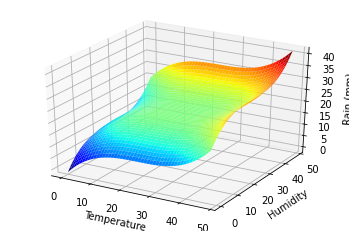

In [3]:
def LoG(x, y, sigma):
    temp = - (x ** 3 + y** 3) / (2 * sigma ** 2)
    return temp

N = 49
half_N = N // 2
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = (-LoG(X2 - half_N, Y2 - half_N, sigma=8) +200)/10

plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X2, Y2, Z2, cmap='jet')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Rain (mm)')

plt.show()

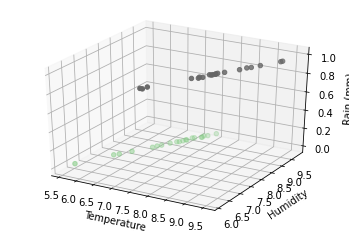

In [4]:
seed = 321
d,t = syn1(40)
x,y = d[:,0],d[:,1]
z = t

plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(x,y,z, c = z, cmap = 'Accent')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Rain (mm)')

plt.show()




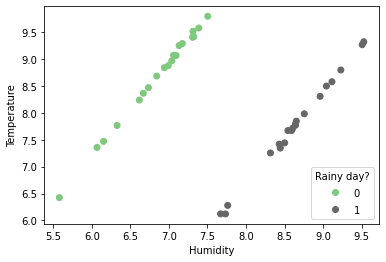

In [5]:
_, ax = plt.subplots()
scat = ax.scatter(x,y,c = z, cmap = 'Accent')
legend1 = ax.legend(*scat.legend_elements(),
                    loc="lower right", title='Rainy day?')
ax.set_xlabel('Humidity')
ax.set_ylabel('Temperature')

plt.show()

###  Can we still use Linear Regression hypothesis?

* Consider a one-feature data.
* In the below example, these two classes are well separated. Fitting a line, one can define a **threshold** to classify the prediction.



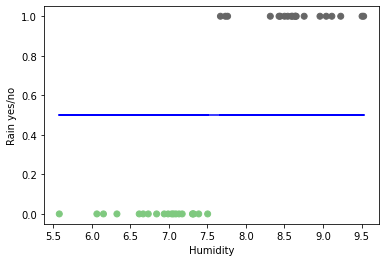

In [6]:
plt.figure()
plt.scatter(x,z,c = z, cmap = 'Accent')
plt.plot(x, y.shape[0]*[0.5],'b')
plt.ylabel('Rain yes/no')
plt.xlabel('Humidity')
plt.show()

### Problems:
* Predicted values are continues, we are interested in probability (range $\in [0,1]$).
    
    In the figure below, all the gray samples of humidity have a probability of $1$, causing a rainy day. However, some of them have a lower probability than the others to cause a rainy day.
  
  
 
* Linear regression for binary classification is sensitive to imbalance data.


We want to limit the hypothesis equation to a specific domain and range.

## Logistic regression to the rescue
Logistic regression is a linear algorithm (with a non-linear transform on output).

While $ X \in \mathbb{R} $

\begin{equation*}
h_{\theta}(x) \in [0,1]
\end{equation*}

Logistic regression is a classification algorithm with the hypothesis:


\begin{equation*}
h_{\theta}(x) = \sigma(\pmb{ \theta_0} +
\mathbf{X} \pmb{ \theta})\\
\text{where} \qquad{} \sigma(x) = \frac{1}{1 + e^{-x} }  
\end{equation*}




The sigmoid function $\sigma(.)$, sometimes called the **logistic function** or squashing function.

t0 = shifts the curve to the right and left
t1 = how compressed the graph is

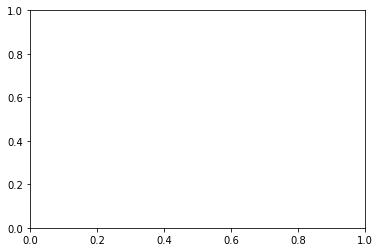

interactive(children=(FloatSlider(value=0.0, description='t0', max=7.0, min=-7.0), FloatSlider(value=1.0, desc…

In [9]:
fig_sigmoid, ax_sigmoid = plt.subplots()
 
p = np.linspace(-10, 10,200)
 
def sigmoid(x, t0=0,t1=1):
    return (1 / (1 + np.exp(- (t0+ t1* x)))).reshape(x.shape[0],1)


@widgets.interact(t0=(-7, 7, .1), t1=(-5, 5, .1))
def update(t0= 0 ,t1 = 1 ):
    [l.remove() for l in ax_sigmoid.lines]
    ax_sigmoid.plot(p, sigmoid(p, t0,t1) , color='C0')


**Modify the linear regression hypothesis by running it through a sigmoid function.**


\begin{equation*}
h_{\theta}^{Logistic}(\mathbf{X}) = \sigma(h_{\theta}^{Linear}(\mathbf{X}))
\end{equation*}

### Logistic regression hypothesis

\begin{equation*}
h_{\theta}(\mathbf{X}) = \frac{1}{1 + e^{- (  \pmb{ \theta_0} +
\mathbf{X} \pmb{ \theta} ) }}  
\end{equation*}

Sigmoid function squishes input and put it into the range zero and one.



In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x.reshape(40,1),z)
t0 =clf.intercept_
t1 = clf.coef_

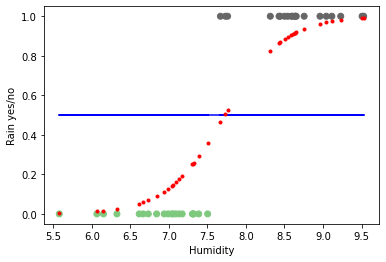

In [11]:
plt.figure()
plt.scatter(x,z,c = z, cmap = 'Accent')
plt.plot(x, y.shape[0]*[0.5],'b')
plt.plot(x.reshape(40,1), Sigmoid(x,t0, t1),'r.')
plt.ylabel('Rain yes/no')
plt.xlabel('Humidity')
plt.show()


### Interpretation of the new hypothesis:
Logistic regression models the probability of the default class ($y=1$)
* What is the chance of rain with humidity of $7.9$?

    * Probability of rain is labeled by one, $y=1$
    
    * Want to predict rain given humidity:
    
     \begin{equation*}     P (y = rain | x= humidity)\end{equation*}
     
    * Have the hypothesis $h_{\theta}(x)$ with the best $\theta$
    
    * In the new sample, humidity is $x= 7.9$ which gives the hypothesis $h_{\theta}(x) = 0.61$
    
    * **The probability that it rains, given the input ($x= 7.9$) parameterized by $\theta$, is $61\%$**.
    
    
    
\begin{align*}
h_{\theta}(x) &= P (y = rain | x;\theta)\\
&= P (y = 1 | x;\theta)
\end{align*}

#### The sum of the probabilities of all outcomes of an event or experiment is equal to one.

$y=1 \quad{} \text{or}  \quad{} 0 $
\begin{equation*}
 P (y = 1 | x;\theta) = 1 -  P (y = 0 | x;\theta) 
\end{equation*}


### Logistic regression hypothesis
For each sample with multiple features:

\begin{equation*}
\color{green}{P (y_i = 1 | \vec{x_i}; \vec{\theta}) = \sigma(\vec{x_i} \vec{\theta}) }
\end{equation*}



## Cost function for Logistic Regression:
* For Linear regression 
    
    \begin{equation*}
    J(\theta) = \text{MSE}\\
    \underset{\theta}{\text{min}} J(\theta)
    \end{equation*}

* What happens if we use **MSE** for Logistic regression?

    * Cost function $J(\theta)$ is a **non-convex function**: not easy to find minimum global point
    * We don't want to calculate distances but probabilities
    
* Output probabilities: choose $\theta$s that give the actual labels in the training data the **highest probability**.



<IPython.core.display.Javascript object>


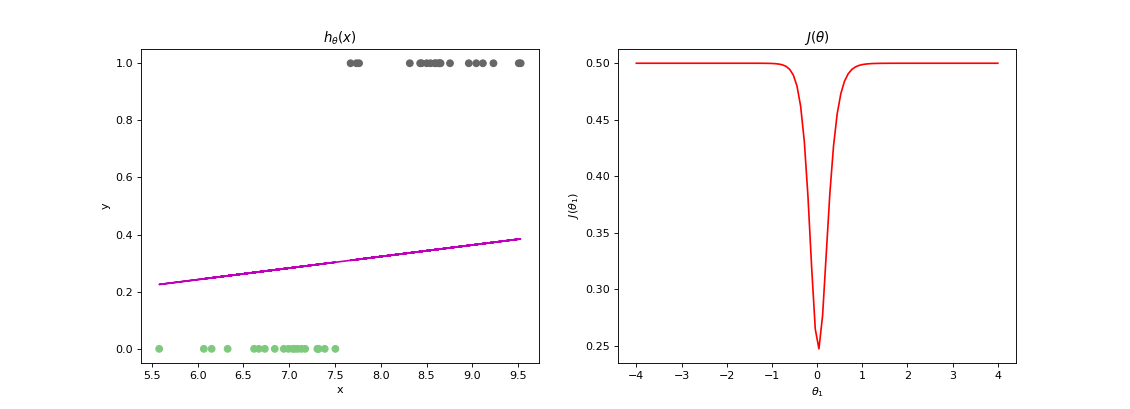

In [ ]:
mse = lambda n, y_pred , y: (1/n) * np.sum( (y_pred - y)**2)



all_theta = np.linspace(-4, 4, 100)
all_mse = [  mse(40,  1 / (1 + np.exp(-i*x)) , z) for i in all_theta]

_, axs = plt.subplots(1, 2)
axs[0].scatter(x,z,c = z, cmap = 'Accent')
axs[0].plot(x, all_theta[np.argmin(all_mse)]*(x) , 'm')
axs[0].set_title(r'$h_\theta(x)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].plot(all_theta, all_mse , 'r')
axs[1].set_title(r'$J(\theta)$')
axs[1].set_xlabel(r'$\theta_1$')
axs[1].set_ylabel(r'$J(\theta_1)$')

plt.show()

## How to estimate the parameters?

* Data with n samples, each has a label zero or one

\

* For sample i with label <span style="color:red">one</span>:

    The goal is to find $\theta$s that  $P (y_i = 1 | x_i;\theta)$ is as close as possible to $1$.



* For sample i with label <span style="color:red">zero</span>:

    The goal is to find $\theta$s that  $P (y = 0 |  x_i;\theta)$ is as close as possible to $0$. Or the complement, $1 - P (y_i = 1 | x_i;\theta)$ is as close as possible to $1$.
 
    
    

## Cross-entropy as a cost function
For binary classification, also called **binary cross-entropy**.

* $y$ true label
* $h_{\theta}(x)$ prediction

\begin{equation*}
\underset{\theta}{\text{max}} P_{\theta}(y_1, y_2, \ldots y_n |x_1, x_2, \ldots x_n)
\end{equation*}


Samples are **independent**

\begin{equation*}
\underset{\theta}{\text{max}} P_{\theta}(y_1|x_1)  P_{\theta}(y_2|x_2) \ldots   P_{\theta}(y_n|x_n) \\
\underset{\theta}{\text{max}} \prod_i^n  P_{\theta}(y_i|x_i)
\end{equation*}

* It is computationally less expensive to use $\log  \prod P(.)$ to break it down to  $  \sum \log P(.)$. 

* A log convex function is always convex.

\begin{equation*}
\underset{\theta}{\text{max}} \sum_i^n  \color{blue}{\log} P_{\theta}(y_i|x_i)
\end{equation*}

* We often have a cost that we **minimize**. We can simply consider the negative of the log probability to change a maximization problem to minimization:


\begin{equation*}
\underset{\theta}{\color{red}{\text{min}}} \sum_i^n - \log P_{\theta}(y_i|x_i)
\end{equation*}

* We have only two cases for the sample i output $y_i$, zero or one.
* We had $ h_{\theta}(x_i) = P(y_i = 1 | x_i;\theta)$ 
* and $ P(y_i = 0 | x_i;\theta) = 1 - P (y_i = 1 | x_i;\theta)  $



\begin{equation*}
  P_{\theta} (y_i | x_i)
    \begin{cases}
       h_{\theta}(x_i) & \text{if} \quad{} y_i =1 \\
    1- h_{\theta}(x_i) & \text{if} \quad{} y_i =0
    \end{cases}       
\end{equation*}

* We can rewrite it as

\begin{equation*}
  P_{\theta} (y_i | x_i) =  h_{\theta}(x_i)^{y_i} (1-  h_{\theta}(x_i))^{1-y_i}
\end{equation*}

### <span style="color:blue">Cross-entropy</span>

The average of the cost function is:

\begin{align*}
J(\theta) &=   \frac{1}{n} \sum_{i=1}^n  \left[ \color{blue}{- y_i \log h_{\theta}(x_i)} \color{green}{- (1- y_i)  \log (1-h_{\theta}(x_i))} \right] \\
\text{or} \\
J(\theta) &=  - \frac{1}{n} \sum_{i=1}^n  \left[ \color{blue}{ y_i \log h_{\theta}(x_i)} \color{green}{+ (1- y_i)  \log (1-h_{\theta}(x_i))} \right]
\end{align*} 
  
  
  
This cost function is commonly called log loss and a special case of **negative log likelihood (NLL)**. Later we learn how to get this cost function with **maximum likelihood estimation (MLE)**. 
  
  
  

### How to minimize logistic regression cost function?

* This one doesn't have a closed-form solution for the cross-entropy cost function.
* Cross-entropy (NLL) function is a convex function. This means the simple 1st order **GD** optimizer is a good choice for optimization.


## Gradient descent for Logistic regression
Learn $\theta$s in an iterative manner.
\begin{align*}
\pmb{ \theta} & :=  \pmb{ \theta} - \alpha \nabla J(\theta)
\end{align*}



With a convex cost function:

\begin{equation*}
J(\theta) =  - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log h_{\theta}(x_i) + (1- y_i)  \log (1-h_{\theta}(x_i)) \right] \\
\underset{\theta}{\text{min}} J(\theta)
\end{equation*} 
  
How to use **Gradient descent** to minimize the cost function?

Repeat until convergence

\begin{align*}
 \frac{\partial  }{\partial \theta_j  }  J(\theta) = ? \qquad{} \forall j 
\end{align*}




![oh no](https://m.media-amazon.com/images/I/51oFBPFRJ5L.jpg)



\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} & = 
\frac{\partial}{\partial \theta_j} \left[-\frac{1}{n}\sum_{i=1}^n
\left[ y_i\log\left(h_\theta \left(x_i\right)\right) +
(1 -y_i)\log\left(1-h_\theta \left(x_i\right)\right)\right]\right]
\\[2ex]
&= \,\frac{-1}{n}\,\sum_{i=1}^n 
\left[ 
y_i\frac{\partial}{\partial \theta_j}\log\left(h_\theta \left(x_i\right)\right) +
(1 -y_i)\frac{\partial}{\partial \theta_j}\log\left(1-h_\theta \left(x_i\right)\right)
\right]
\\[2ex]
& = \,\frac{-1}{n}\,\sum_{i=1}^n 
\left[ 
y_i\frac{\frac{\partial}{\partial \theta_j}h_\theta \left(x_i\right)}{h_\theta\left(x_i\right)} +
(1 -y_i)\frac{\frac{\partial}{\partial \theta_j}\left(1-h_\theta \left(x_i\right)\right)}{1-h_\theta\left(x_i\right)}
\right]
\\[2ex]
&=\,\frac{-1}{n}\,\sum_{i=1}^n
\left[ 
y_i\frac{\frac{\partial}{\partial \theta_j}\sigma\left(\theta^\top x_i\right)}{h_\theta\left(x_i\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \theta_j}\left(1-\sigma\left(\theta^\top x_i\right)\right)}{1-h_\theta\left(x_i\right)}
\right]
\\[2ex]
&=\frac{-1}{n}\,\sum_{i=1}^n 
\left[ y_i\,
\frac{\sigma\left(\theta^\top x_i\right)\left(1-\sigma\left(\theta^\top x_i\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x_i\right)}{h_\theta\left(x_i\right)} -
(1 -y_i)\,\frac{\sigma\left(\theta^\top x_i\right)\left(1-\sigma\left(\theta^\top x_i\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x_i\right)}{1-h_\theta\left(x_i\right)}
\right]
\\[2ex]
&= \,\frac{-1}{n}\,\sum_{i=1}^n
\left[ 
y_i\frac{h_\theta\left( x_i\right)\left(1-h_\theta\left( x_i\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x_i\right)}{h_\theta\left(x_i\right)} -
(1 -y_i)\frac{h_\theta\left( x_i\right)\left(1-h_\theta\left(x_i\right)\right)\frac{\partial}{\partial \theta_j}\left( \theta^\top x_i\right)}{1-h_\theta\left(x_i\right)}
\right]
\\[2ex]
&=\,\frac{-1}{n}\,\sum_{i=1}^n \left[y_i\left(1-h_\theta\left(x_i\right)\right)x_{ij}
\left(1-y_i\right)\,h_\theta\left(x_i\right)x_{ij}
\right]
\\[2ex]
&=\,\frac{-1}{n}\,\sum_{i=1}^n \left[y_i-y_ih_\theta\left(x_i\right)-
h_\theta\left(x_i\right)+y_ih_\theta\left(x_i\right)
\right]\,x_{ij}
\\[2ex]
&=\,\frac{-1}{n}\,\sum_{i=1}^n \left[y_i-h_\theta\left(x_i\right)\right]\,x_{ij}\\[2ex]
&=\frac{1}{n}\sum_{i=1}^n\left[h_\theta\left(x_i\right)-y_i\right]\,x_{ij}
\end{align*}


### <span style="color:blue">GD for Logistic regression</span>

Repeat until convergence

\begin{align*}
\theta_j & :=  \theta_j - \alpha  \frac{1}{n}\sum_{i=1}^n\left[h_\theta\left(x_i\right)-y_i\right] . x_{ij} \qquad{} \forall j \\
\text{or}\\
\pmb{ \theta} & :=  \pmb{ \theta} -  \frac{\alpha}{n} \mathbf{X}^\intercal (h_{\theta}(\mathbf{x}) - \vec{y})
\end{align*}


This is equivalent to Linear regression gradient descent but we have different $h_\theta(x)$.

* After finding the best $\theta$s, similar to linear regression, we can plug in these $\theta$s back into the hypothesis ($ h_{\theta}(x_i) = P(y_i = 1 | x_i;\theta)$ ) to find the probability for each sample:

\begin{equation*}
\text{Prediction for sample  } i = 
    \begin{cases}
       1 & \text{if} \quad{} P (y_i =1 | x_i; \pmb{ \theta}^*) \geq 0.5 \\
       0 & \text{if} \quad{} P(y_i =1 | x_i; \pmb{ \theta}^*) < 0.5
    \end{cases}       
\end{equation*}

### Feature scaling applies for logistic regression as well, similar to linear regression.

## Decision boundary

A boundary that model uses to make decisions!

* After training the model and finding the best $ \pmb{ \theta}^*$, we can use them to find the decision boundary.
* With threshold = $50\%$ we get concrete yes/no answer

\begin{equation*}
\text{Prediction for sample  } i = 
    \begin{cases}
       1 & \text{if} \quad{} P(y_i =1 | x_i; \pmb{ \theta}^*) \geq 0.5 \\
       0 & \text{if} \quad{} P(y_i =1 | x_i; \pmb{ \theta}^*) < 0.5
    \end{cases}       
\end{equation*}

* We can have <span style="color:red">different threshold</span>. We come back to different threshold later.




How does Logistic regression choose the decision boundary?



### Decision boundary in 1 dimension (one feature) when threshold = 0.5:
\begin{equation*}
h_\theta(x) = \sigma(\theta_0^* + \theta_1^* x) 
\end{equation*}


<span style="color:red">Point decision boundary :</span> 


\begin{equation*}
x = - \frac{\theta_0^*}{\theta_1^*}\\
P_{\theta} (y_i =1 | x_i = - \frac{\theta_0^*}{\theta_1^*}  ) = 0.5
\end{equation*}


<IPython.core.display.Javascript object>


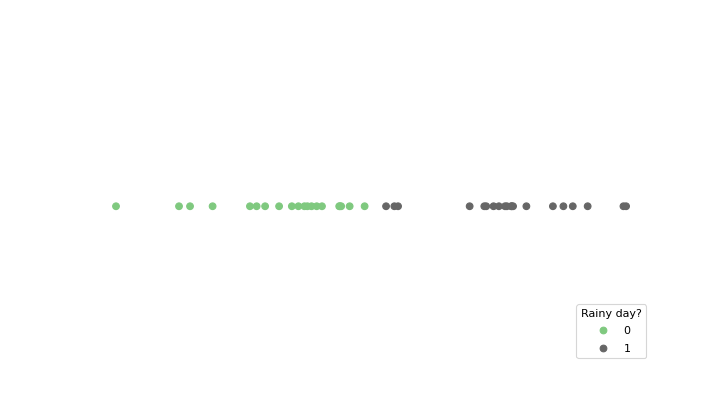

In [ ]:
_, ax = plt.subplots()
scat = ax.scatter(x, x.shape[0]*[0] , c = z, cmap = 'Accent')
legend1 = ax.legend(*scat.legend_elements(),
                    loc="lower right", title="Rainy day?")
ax.set_xlabel('Humidity')
ax.axis('off')
plt.show()

### Decision boundary in 2 dimensions (two feature) when threshold = 0.5:


\begin{equation*}
h_\theta(x) = \sigma(\theta_0^* + \theta_1^* x_1 + \theta_2^* x_2) 
\end{equation*}


<span style="color:red">Line decision boundary :</span> 


\begin{equation*}
\theta_0^* + \theta_1^* x_1 + \theta_2^* x_2 = 0\\
P_{\theta} (y_i =1 | \theta_0^* + \theta_1^* x_{i1}+ \theta_2^* x_{i2} =0 ) = 0.5
\end{equation*}

2 features --> 1D decision boundary and 2D sigmoid function

In [ ]:
clf = LogisticRegression(random_state=0).fit(d,z)
t0 =clf.intercept_
t1 = clf.coef_
print(t0,t1)
x_d = [np.min(d[:, 0] ), np.max(d[:, 1] )]
y_d = - (t0 + np.dot(t1[0,0], x_d)) /t1[0,1]
print()

[-7.2332344] [[ 2.30846694 -1.29506706]]



<IPython.core.display.Javascript object>


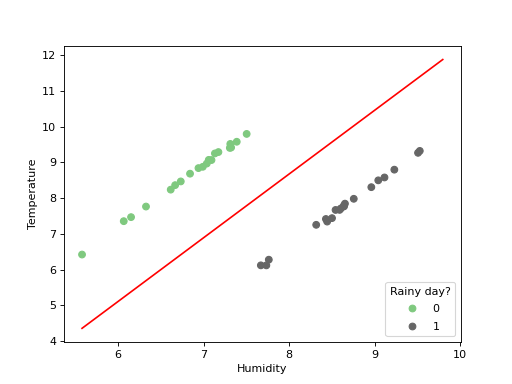

In [ ]:
fig_dc_bounf, ax_dc_bounf = plt.subplots()
scat = ax_dc_bounf.scatter(x,y,c = z, cmap = 'Accent')
legend1 = ax_dc_bounf.legend(*scat.legend_elements(),
                    loc="lower right", title="Rainy day?")

ax_dc_bounf.plot(x_d, y_d, 'r')
ax_dc_bounf.set_xlabel('Humidity')
ax_dc_bounf.set_ylabel('Temperature')
plt.show()

### For m features:

\begin{equation*}
h_\theta(x) = \sigma(\theta_0^* + \theta_1^* x_1 + \ldots +  \theta_m^* x_m) 
\end{equation*}


<span style="color:red"> (m-1) dimenion decision boundary :</span> 


\begin{equation*}
\theta_0^* + \theta_1^* x_1 + \ldots + \theta_m^* x_m = 0\\
P_{\theta} (y_i =1 | \theta_0^* + \theta_1^* x_{i1}+ \ldots + \theta_{im}^* x_m = 0 ) = 0.5
\end{equation*}


### Logistic regression with the polynomial hypothesis

Similar to Linear regression, we can have polynomials with different degrees in the hypothesis.

\begin{equation*}
h_{\theta}(x) = \sigma( \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 )
\end{equation*}

* With Logistic polynomial regression, we can have non-linear decision boundaries.

<IPython.core.display.Javascript object>


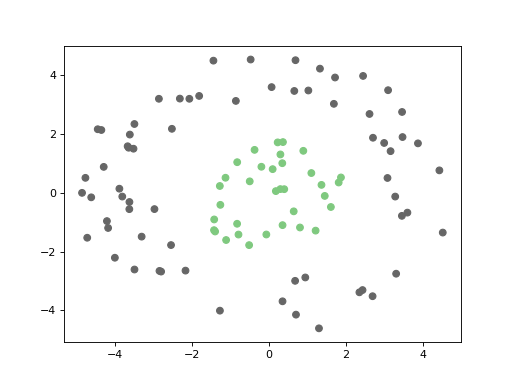

In [ ]:
def syn3(N):
    """ data(samples, features)"""

    global seed
    
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(2*N/3)
    
    # disk
    teta_d = np.random.uniform(0, 2*np.pi, N1)
    inner, outer = 3, 5
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N1))
    data[:N1,0],data[:N1,1] = r2*np.cos(teta_d), r2*np.sin(teta_d)
        
    #circle
    teta_c = np.random.uniform(0, 2*np.pi, N-N1)
    inner, outer = 0, 2
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N-N1))
    data[N1:,0],data[N1:,1] = r2*np.cos(teta_c), r2*np.sin(teta_c)
 
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    return data, tar

seed = 2
np.random.seed(seed) if seed else None


d,t = syn3(100)
plt.figure()
plt.scatter(d[:,0],d[:,1], c=t, cmap = 'Accent')
plt.show()

## Regularization

\begin{equation*}
h_{\theta}(x) = \sigma( \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1^2 x_2^2 + \ldots)
\end{equation*}

* With more complex hypothesis --> <span style="color:red"> overfitting </span> 



* Logistic regression cost function with <span style="color:blue"> L2 regularization </span> 


\begin{equation*}
J(\theta) =  - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log h_{\theta}(x_i) + (1- y_i)  \log (1-h_{\theta}(x_i))\right] \color{red}{ + \frac{\lambda}{n} \sum_{j=1}^m  \theta_j^2}  
\end{equation*} 

* Upgraded GD with L2 regularization

\begin{align*}
\pmb{ \theta} & :=  \pmb{ \theta} -  \frac{\alpha}{n} \left [ \mathbf{X}^\intercal (h_{\theta}(\mathbf{x}) - \vec{y})  \color{red}{ + 2\lambda \pmb{\theta} } \right]   
\end{align*}


<IPython.core.display.Javascript object>


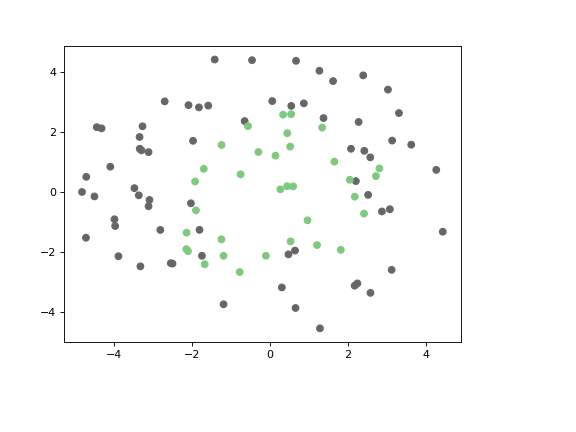

In [ ]:
def syn3(N):
    """ data(samples, features)"""

    global seed
    
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(2*N/3)
    
    # disk
    teta_d = np.random.uniform(0, 2*np.pi, N1)
    inner, outer = 2, 5
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N1))
    data[:N1,0],data[:N1,1] = r2*np.cos(teta_d), r2*np.sin(teta_d)
        
    #circle
    teta_c = np.random.uniform(0, 2*np.pi, N-N1)
    inner, outer = 0, 3
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N-N1))
    data[N1:,0],data[N1:,1] = r2*np.cos(teta_c), r2*np.sin(teta_c)
 
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    return data, tar

seed = 2
np.random.seed(seed) if seed else None


d,t = syn3(100)
plt.figure()
plt.scatter(d[:,0],d[:,1], c=t, cmap = 'Accent')
plt.show()

# Logistic regression cheat sheet



|   	|   Hypothesis 	|   Cost Function	|   GD	|  	
|:-:	|:-:	|:-:	|:-:	|
|  Without L2  	|  \begin{equation*}
 \frac{1}{1 + e^{- (  \pmb{ \theta_0} +
\mathbf{X} \pmb{ \theta} ) }}  
\end{equation*} | \begin{equation*}
J(\theta) =  - \frac{1}{n} \left[ y^T \log h_{\theta}(x) + (1- y)^T  \log (1-h_{\theta}(x_i))\right] \end{equation*}  | \begin{align*}
\pmb{ \theta} & :=  \pmb{ \theta} -  \frac{\alpha}{n} \mathbf{X}^\intercal (h_{\theta}(\mathbf{x}) - \vec{y})
\end{align*}  |  
|   With L2	| \begin{equation*}
 \frac{1}{1 + e^{- (  \pmb{ \theta_0} +
\mathbf{X} \pmb{ \theta} ) }}  
\end{equation*}|   \begin{equation*}
J(\theta) =  - \frac{1}{n} \left[ y^T \log h_{\theta}(x) + (1- y)^T  \log (1-h_{\theta}(x_i))\right] \color{red}{ + \frac{\lambda}{n} \sum_{j=1}^m  \theta_j^2}  
\end{equation*} |\begin{align*}
\pmb{ \theta} & :=  \pmb{ \theta} -  \frac{\alpha}{n} \left [ \mathbf{X}^\intercal (h_{\theta}(\mathbf{x}) - \vec{y})  \color{red}{ + 2\lambda \pmb{\theta} } \right]   
\end{align*}|  

<h1 align="center"> The end</h1> 